# Exercisesheet 5
## Exo 2

In [35]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [8]:
mean = np.array([1.,2.])
cov = np.array([[1.,0.9],[0.9,1]])
x,y= np.random.multivariate_normal(mean,cov,100).T
X=np.stack([np.ones_like(x),x],axis=1)

We have :

$$p(\omega) = N(\omega|[0, 0]^T,I) $$
$$p(y|X\omega,I)= N(Xy,I) $$

So with the knowledge from the lecture we can state that the posterior distribution is given by:

$$ p(\omega|X,y)=N(\omega_n,V_n)$$
With:
$$V_n= (X^TX+I_d)^{-1}$$
$$w_n= (X^TX+I_d)^{-1}X^Ty$$

The following code computes this distribution and plots the distribution as well as the training data:

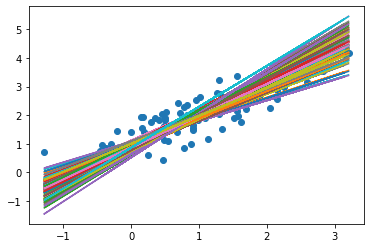

In [52]:
#Calculate Mean and Variance
Id= np.identity(2)
Vn=np.linalg.inv(np.matmul(X.T,X)+Id)
wn= np.matmul(Vn,np.matmul(X.T,y))

#Get hyperparameters 
w=scipy.stats.multivariate_normal.rvs(mean=wn, cov=Vn, size=100)

#Plot
plt.scatter(x,y)
for w0 in w:
    plt.plot(x, w0[0]*x + w0[1])